# 99 % on MNIST

In this example i try to get 99% Accuracy on the Testset of the MNIST-Dataset.

## Imports

In [1]:
from main import Model                # the main class
from optimizer import Adam            # the optimizer i will use for training
import numpy as np
import tensorflow.keras as keras      # just for downloading the dataset
from EvaluationPlot import *          # some functions for plotting
from helperfunctions import one_hot   # hot-encodes values

# noise images 
from helperfunctions import add_noise, shot_noise, impulse_noise, motion_noise

## Download and prepairing the data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path='mnist.npz')

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(len(x_train), 1, 28, 28)
x_test = x_test.reshape(len(x_test), 1, 28, 28)

y_train = one_hot(y_train)
y_test = one_hot(y_test)

## Create some noise Images to add to the dataset

classic normal-noise

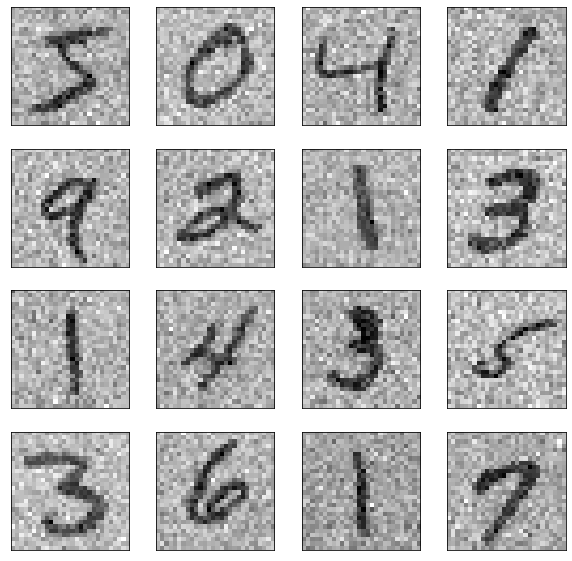

In [3]:
x_train_noise = add_noise(x_train, 0.2)
show_images(x_train_noise[:16])

set some values to zero

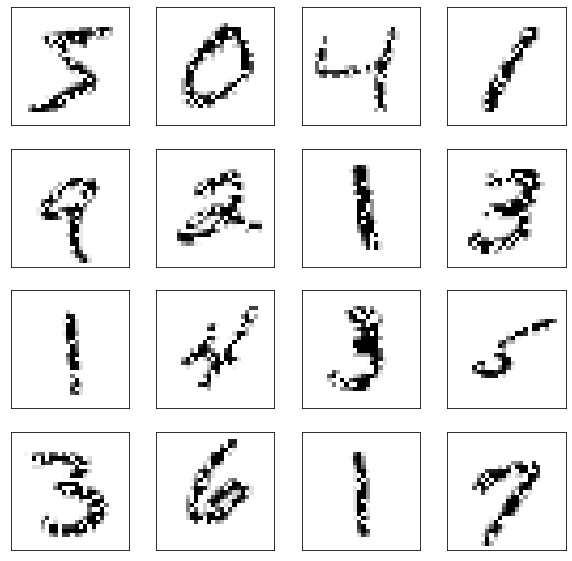

In [4]:
x_train_shot = shot_noise(x_train, 0.3)
show_images(x_train_shot[:16])

set some values to withe if they are dark or to black if they are bright

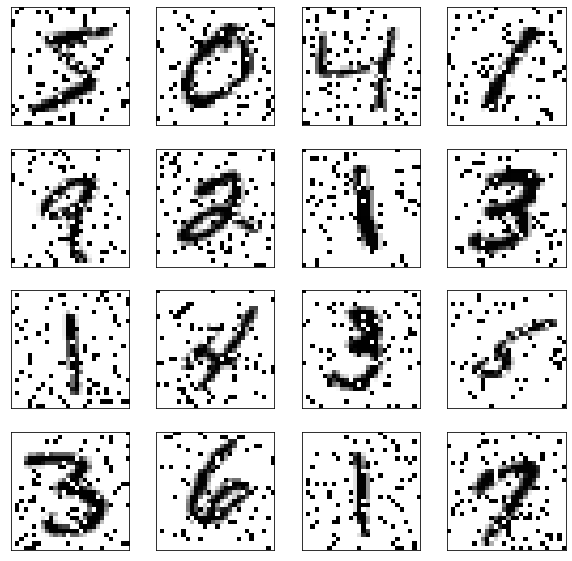

In [5]:
x_train_impulse = impulse_noise(x_train, 0.1)
show_images(x_train_impulse[:16])

add some motion

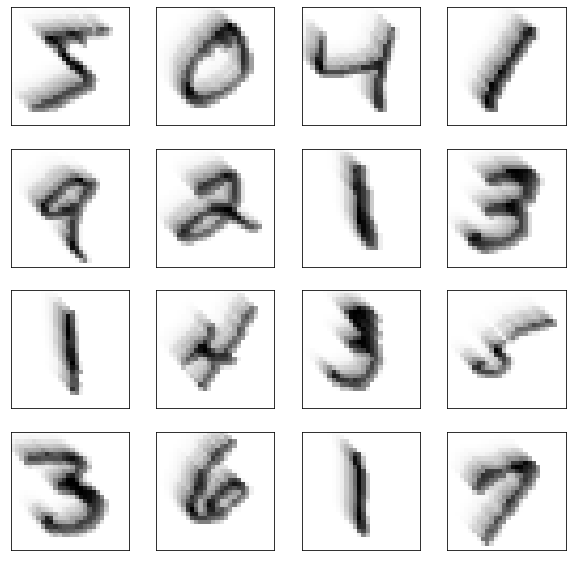

In [6]:
x_train_motion = motion_noise(x_train, 0.5)
show_images(x_train_motion[:16])

## one Dataset

In [7]:
x_train = np.concatenate((x_train, x_train_noise, x_train_shot, x_train_impulse, x_train_motion))
y_train = np.array([y_train] * 5).reshape(60000*5, 10)

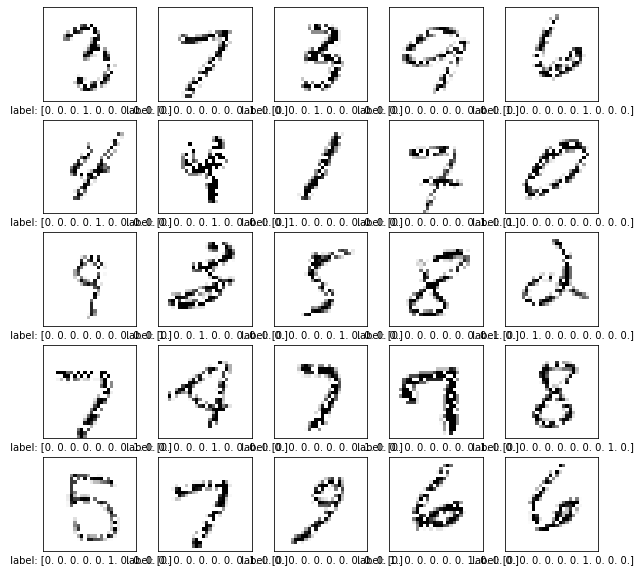

In [8]:
labels = y_test.argmax(axis=1)
nr = 150000
show_images(x_train[nr:nr+25], y_true=labels[nr:nr+25])

## Build the model

In [9]:
nn = Model(model_name='NineNine')

In [10]:
architecture = [
        {"layer_type": "Flatten", 'input_shape': (1, 28, 28)},

        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},
    
        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},


        {"layer_type": "Dense", "neurons": 64, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense",  "neurons": 64, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 32, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.98},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 32, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.98},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 10}
    ]

In [11]:
optimizer = Adam(lr=.1)

In [12]:
nn.compile(architecture, loss='categorical_crossentropy', optimizer=optimizer)

In [13]:
nn.summary()

NineNine summary:
layer-type                input_shape    output_shape    neurons    trainable-params    activation-function
------------------------  -------------  --------------  ---------  ------------------  ---------------------
Flatten                   (1, 28, 28)    (784,)          0          0                   -
Dense                     (784,)         128             128        100480              -
BatchNormalization        128            128             0          256                 -
Activation                128            128             0          0                   relu
Dropout                   128            128             0          0                   -
Dense                     128            128             128        16512               -
BatchNormalization        128            128             0          256                 -
Activation                128            128             0          0                   relu
Dropout                   128         

## Training

In [14]:
loss, acc = nn.train(x_train, y_train, batchsize=256, epochs=15, shuffle=True, x_test=x_test, y_test=y_test, policy='both')
nn.save()

start training [epochs: 15, batchsize: 256, shuffle: True, policy: both]
epoch 1 / 15: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1172 of 1172 batches trained (0h 0min 0sec)) 
epoch 1: loss: 1.2256136545548617 acc: 0.9314
 
epoch 2 / 15: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1172 of 1172 batches trained (0h 0min 0sec)) 
epoch 2: loss: 0.92182948664789 acc: 0.9538
 
epoch 3 / 15: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1172 of 1172 batches trained (0h 0min 0sec)) 
epoch 3: loss: 0.6659710619032416 acc: 0.9671
 
epoch 4 / 15: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1172 of 1172 batches trained (0h 0min 0sec)) 
epoch 4: loss: 0.8416510877216368 acc: 0.9679
 
epoch 5 / 15: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1172 of 1172 batches trained (0h 0min 0sec)) 
epoch 5: loss: 0.7846551479416567 acc: 0.9647
 
epoch 6 / 15: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1172 of 1172 batches trained (0h 0min 0sec)) 
epoch 6: lo

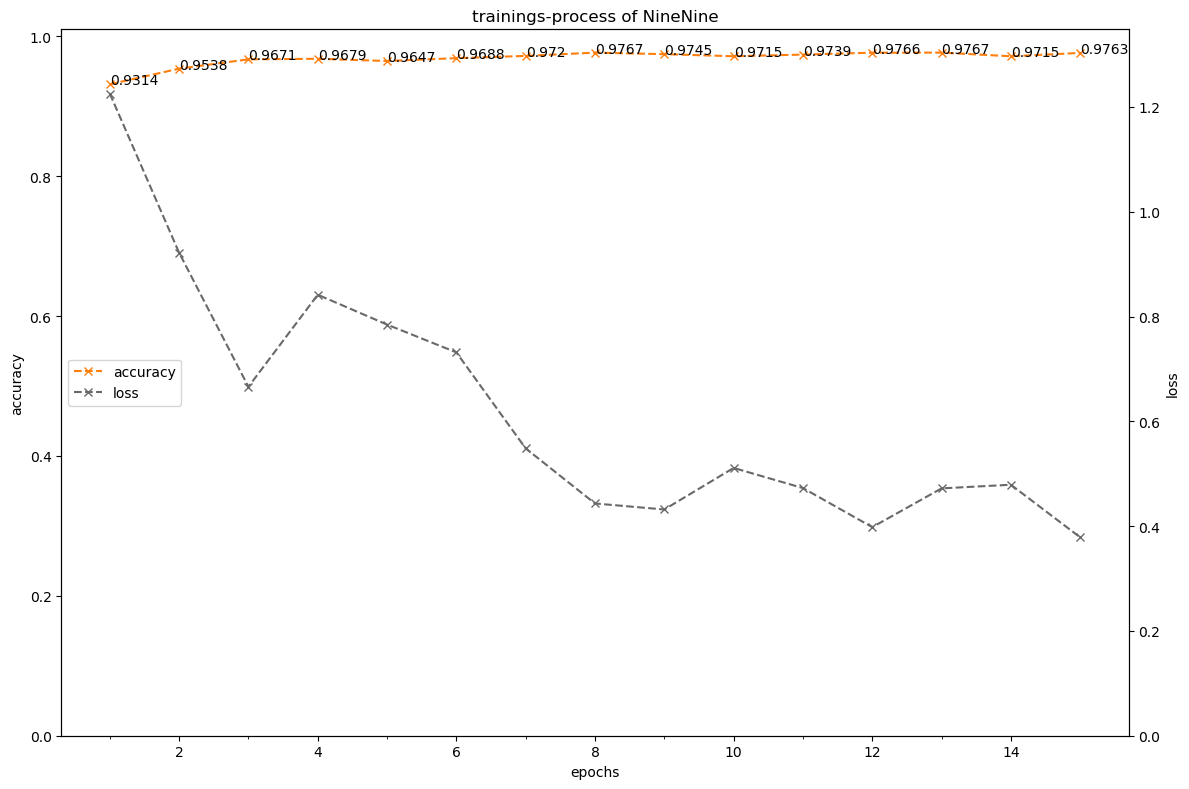

In [15]:
plot_trainingsprocess(loss, acc, name=nn.model_name, save=True)

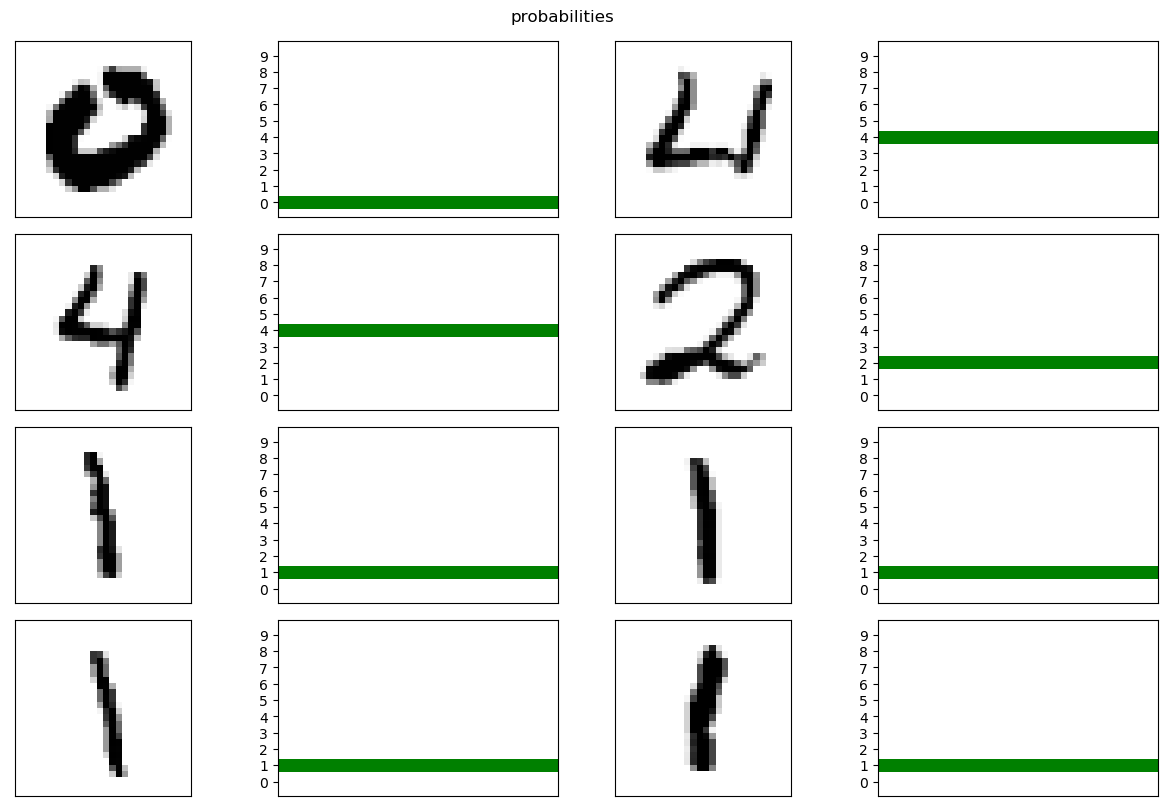

In [16]:
pred, prob = nn.predict(x_test, return_probability=True)

nr=25
showImagesWithProbabilities(x_test[nr:nr+16], prob[nr:nr+16], labels[nr:nr+16])